## Import Dataset

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1dydbU9HlSIgGQBzYMLogDNI27uO6wga7?usp=drive_link

Retrieving folder contents
Retrieving folder 18jHYsTY6jycKhOJD94MW3SXjoDiwjnCc Data_อาคารจามจุรี 9
Processing file 1Vaiou5E3ZVrIEa5etL4p0fMMAfknhnGL รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-06-2024.xlsx
Processing file 10s5mmIUpazVKxJYM3-eO0YEYgii3sGIx รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-07-2024.xlsx
Processing file 1JHVpDqwYYiDCn8tA-ldoXOrRfVQNg4lA รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-08-2024.xlsx
Processing file 1yNwJgHxR_HO6eyb8NUB0kMsw8DPOCcI4 รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-09-2024.xlsx
Processing file 1TpoAyqP1zGbb9cxi2hsoZTiFKX3MkxLP รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-02-2024.xlsx
Processing file 1p5SpyFtAtk-FX_dd0DEPXsopfGJavker รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-01-2024.xlsx
Processing file 1eKf4oYaMylY90vWTAGTBFotOcp0bA_nZ รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-04-2024.xlsx
Processing file 12CVOQWTfgBJ7CMimiPsI8-H-VbKrF9fg รายงานสรุป-Demand-รายวัน-อาคารจามจุรี9-03-2024.xlsx
Processing file 15uy45zg_JacL8lcfYPWSqtZ3jtOb8lgu รายงานสรุป-Demand-รายวัน-อาคารจามจุ

## Load & Clean the Data

In [ ]:
import pandas as pd
tmp_df = pd.read_excel("/content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-01-2024.xlsx")

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Define your cleaning function
def clean_header_and_drop_unuse_row(tmp_df):
    tmp_df.columns = tmp_df.iloc[0]
    tmp_df = tmp_df[1:]
    tmp_df = tmp_df.reset_index(drop=True)
    if 'Date' in tmp_df.columns:
        tmp_df = tmp_df[~pd.isna(tmp_df['Date'])]
    return tmp_df

# Helper function to process a single file
def process_file(file_info):
    file_path, rel_path = file_info

    try:
        tmp_df = pd.read_excel(file_path)
        cleaned_df = clean_header_and_drop_unuse_row(tmp_df)

        # Construct new CSV path
        output_path = os.path.join("/content/cleaned_data", rel_path).replace(".xlsx", ".csv")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save to CSV
        cleaned_df.to_csv(output_path, index=False)
        return f"✅ Processed: {file_path}"
    except Exception as e:
        return f"❌ Error with {file_path}: {str(e)}"

# Gather all .xlsx files with relative paths
xlsx_files = []
root_dir = "/content/Load-data"

for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".xlsx"):
            full_path = os.path.join(subdir, file)
            rel_path = os.path.relpath(full_path, root_dir)
            xlsx_files.append((full_path, rel_path))

# Run in parallel using Pool
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap_unordered(process_file, xlsx_files), total=len(xlsx_files)))

# Optional: Print summary
for res in results:
    print(res)

100%|██████████| 71/71 [00:03<00:00, 19.76it/s]

✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-01-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-04-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-06-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-12-2023.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-07-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-10-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-05-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-08-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-11-2024.xlsx
✅ Processed: /content/Load-data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-03-2024.xlsx
✅ Processed: /content/Load-dat

## Preprocess

In [ ]:
import os
import pandas as pd
import re
from datetime import datetime
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Updated function
def preprocess_convert_datatype_with_date(tmp_df, filename):
    # Extract MM-YYYY from filename
    match = re.search(r"(\d{2})-(\d{4})", filename)
    if not match:
        raise ValueError(f"Cannot extract date from filename: {filename}")

    start_month = int(match.group(1))
    start_year = int(match.group(2))

    # Generate datetime range
    num_days = len(tmp_df)
    date_range = pd.date_range(start=datetime(start_year, start_month, 1), periods=num_days, freq='D')
    tmp_df['Date'] = date_range

    # Convert all other columns to numeric
    time_cols = [col for col in tmp_df.columns if col != "Date"]
    tmp_df[time_cols] = tmp_df[time_cols].apply(pd.to_numeric, errors='coerce')

    return tmp_df

# Wrapper for parallel processing
def process_csv_file(file_info):
    file_path, rel_path = file_info

    try:
        tmp_df = pd.read_csv(file_path)
        processed_df = preprocess_convert_datatype_with_date(tmp_df, os.path.basename(file_path))

        # Extract station name from relative path
        station_name = os.path.normpath(rel_path).split(os.sep)[0]
        processed_df.insert(0, 'station_name', station_name)  # Add as first column

        # Save to new folder
        output_path = os.path.join("/content/preprocessed_data", rel_path)
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        processed_df.to_csv(output_path, index=False)
        return f"✅ Processed: {file_path}"
    except Exception as e:
        return f"❌ Error with {file_path}: {str(e)}"

# Collect files
csv_files = []
root_dir = "/content/cleaned_data"

for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".csv"):
            full_path = os.path.join(subdir, file)
            rel_path = os.path.relpath(full_path, root_dir)
            csv_files.append((full_path, rel_path))

# Run in parallel
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap_unordered(process_csv_file, csv_files), total=len(csv_files)))

# Optional: Print summary
for res in results:
    print(res)

100%|██████████| 71/71 [00:03<00:00, 20.96it/s]

✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-10-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-01-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-09-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-05-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-04-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-02-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-03-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-07-2024.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-12-2023.csv
✅ Processed: /content/cleaned_data/Data_สถานีชาร์จ/รายงานสรุป-Demand-รายวัน-สถานีชาร์จ-06-2024.csv
✅ Processe

## EDA

In [ ]:
!rm -rf font

In [ ]:
!unzip "/content/Roboto Prompt.zip" -d "font"

Archive:  /content/Roboto Prompt.zip
replace font/Roboto/OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace font/Roboto/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# ─────────────────────────────────────────────
# 📌 Set Thai Font: Prompt-Regular.ttf
# ─────────────────────────────────────────────
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")
# Load custom font
font_path = "/content/font/Prompt/Prompt-Regular.ttf"
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# ─────────────────────────────────────────────
# 📁 EDA by Subfolder (station)
# ─────────────────────────────────────────────
import pandas as pd
import os
from glob import glob
from tqdm import tqdm

# Folder containing preprocessed data
preprocessed_root = "/content/preprocessed_data"

# Step 1: Group CSVs by station folder
folder_groups = {}
for csv_file in glob(os.path.join(preprocessed_root, '**', '*.csv'), recursive=True):
    station_folder = os.path.normpath(csv_file).split(os.sep)[-2]  # Get station name from parent folder
    folder_groups.setdefault(station_folder, []).append(csv_file)

# Step 2: EDA loop
for station, files in folder_groups.items():
    print(f"\n📊 EDA สำหรับสถานี: {station}")

    # Combine CSVs for this station
    dfs = [pd.read_csv(f) for f in files]
    station_df = pd.concat(dfs, ignore_index=True)

    # Show info
    print("✅ จำนวนแถวและคอลัมน์:", station_df.shape)
    print("📅 ช่วงวันที่:", station_df['Date'].min(), "→", station_df['Date'].max())
    print("🧾 คอลัมน์:", station_df.columns.tolist())

    # Missing value summary
    print("❗ ค่า Missing:\n", station_df.isna().sum())

    # Total usage calculation
    time_cols = [col for col in station_df.columns if col not in ['Date', 'station_name']]
    station_df['TotalUsage'] = station_df[time_cols].sum(axis=1)

    station_df['Date'] = pd.to_datetime(station_df['Date'])
    daily_usage = station_df.groupby('Date')['TotalUsage'].sum()

    # Plot daily usage
    plt.figure(figsize=(10, 4))
    plt.plot(daily_usage.index, daily_usage.values)
    plt.title(f"{station} - การใช้ไฟฟ้ารวมรายวัน", fontsize=14, fontproperties=custom_font)
    plt.xlabel("วันที่", fontproperties=custom_font)
    plt.ylabel("การใช้ไฟฟ้า (kW)", fontproperties=custom_font)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Decomposition

In [ ]:
# ─────────────────────────────────────────────
# 📌 Suppress Warnings
# ─────────────────────────────────────────────
import warnings
warnings.filterwarnings("ignore")

# ─────────────────────────────────────────────
# 📌 Set Thai Font: Prompt-Regular.ttf
# ─────────────────────────────────────────────
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

font_path = "/content/font/Prompt/Prompt-Regular.ttf"
custom_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = custom_font.get_name()

# ─────────────────────────────────────────────
# 📦 Imports
# ─────────────────────────────────────────────
import pandas as pd
import os
from glob import glob
from tqdm import tqdm
from statsmodels.tsa.seasonal import seasonal_decompose

# ─────────────────────────────────────────────
# 📁 Seasonal Decomposition by Station
# ─────────────────────────────────────────────
preprocessed_root = "/content/preprocessed_data"

# Step 1: Group CSVs by station folder
folder_groups = {}
for csv_file in glob(os.path.join(preprocessed_root, '**', '*.csv'), recursive=True):
    station_folder = os.path.normpath(csv_file).split(os.sep)[-2]
    folder_groups.setdefault(station_folder, []).append(csv_file)

# Step 2: EDA + Decomposition
for station, files in folder_groups.items():
    print(f"\n📊 EDA + Decomposition สำหรับสถานี: {station}")

    # Combine CSVs
    dfs = [pd.read_csv(f) for f in files]
    station_df = pd.concat(dfs, ignore_index=True)

    # Parse dates
    station_df['Date'] = pd.to_datetime(station_df['Date'])

    # Set 'Date' as index for easier time series operations
    station_df = station_df.set_index('Date').sort_index()

    # Calculate TotalUsage
    time_cols = [col for col in station_df.columns if col not in ['station_name']] # 'Date' is now index
    station_df['TotalUsage'] = station_df[time_cols].sum(axis=1)

    # Group daily usage and resample to daily frequency, summing usage for each day
    # This step will create NaNs for any missing days automatically
    daily_usage = station_df['TotalUsage'].resample('D').sum()

    # Handle NaNs: For decomposition, it's critical to have no NaNs.
    # ffill is acceptable for short gaps, but be aware of its limitations.
    # If you have long periods of missing data, consider other imputation methods
    # or acknowledge that decomposition might be less accurate.
    daily_usage = daily_usage.fillna(method='ffill')
    # An alternative for decomposition if ffill is not desired is to interpolate:
    # daily_usage = daily_usage.interpolate(method='time') # This might be better for some cases

    # Check for remaining NaNs after fillna (should be none)
    if daily_usage.isnull().any():
        print(f"Warning: NaNs still present in {station} daily_usage after ffill. Decomposition might fail or be inaccurate.")
        continue # Skip to the next station if decomposition won't work

    # Seasonal decomposition (daily series, assumes 7-day weekly seasonality)
    # Ensure the series is long enough for the period. For period=7, you need at least 2*7 = 14 data points.
    if len(daily_usage) < 2 * 7: # Minimum 2 full cycles for reliable decomposition
        print(f"Skipping decomposition for {station}: Not enough data points ({len(daily_usage)}) for period=7.")
        continue


    result = seasonal_decompose(daily_usage, model='additive', period=7)

    fig = result.plot()
    fig.set_size_inches(16, 10)  # Wider and taller

    # Title in Thai with font
    fig.suptitle(f'{station} - การแยกองค์ประกอบของข้อมูลเวลา', fontsize=18, fontproperties=custom_font, y=1.02)

    # Improve tick frequency and format
    for ax in fig.axes:
        ax.set_ylabel("", fontproperties=custom_font)
        ax.tick_params(axis='x', labelrotation=45)

        # Set major ticks to weekly intervals for better detail
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # show every week
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))     # format: 01-Jul

    plt.tight_layout()
    plt.show()

## Preprocess

In [ ]:
# After processing is done, concatenate all processed files
all_data = []

output_root = "/content/preprocessed_data"

for subdir, _, files in os.walk(output_root):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(subdir, file)
            try:
                df = pd.read_csv(file_path)
                all_data.append(df)
            except Exception as e:
                print(f"❌ Failed to read {file_path}: {e}")

# Concatenate all data
if all_data:
    all_data_df = pd.concat(all_data, ignore_index=True)
    all_data_df.to_csv("/content/all_data_df.csv", index=False)
    print("✅ All data concatenated and saved to /content/all_data_df.csv")
else:
    print("⚠️ No data was loaded for concatenation.")
import re

# Identify time columns (HH:MM format)
time_columns = [col for col in all_data_df.columns if re.match(r"^\d{1,2}:\d{2}$", str(col))]

# Melt the DataFrame to long format
long_df = all_data_df.melt(
    id_vars=['station_name', 'Date'],
    value_vars=time_columns,
    var_name='Time',
    value_name='Electricity(kW)'
)

# Combine 'Date' and 'Time' into full datetime
long_df['Date'] = pd.to_datetime(long_df['Date'].astype(str) + ' ' + long_df['Time'])

# Drop 'Time' column
long_df.drop(columns=['Time'], inplace=True)

# Sort by station_name first, then by Date
long_df.sort_values(by=['station_name', 'Date'], inplace=True)

# Save to CSV
long_df.to_csv('/content/all_data_timeseries.csv', index=False)
print("✅ Time series data saved and sorted by station_name > Date to /content/all_data_timeseries.csv")

✅ All data concatenated and saved to /content/all_data_df.csv
✅ Time series data saved and sorted by station_name > Date to /content/all_data_timeseries.csv


## Define Weight

In [ ]:
# Count the number of rows per station
station_counts = long_df['station_name'].value_counts()

# Normalize so max count has weight = 1
max_count = station_counts.max()
normalized_reverse_weights = max_count / station_counts

# Convert to DataFrame for easier viewing
station_weights_df = normalized_reverse_weights.reset_index()
station_weights_df.columns = ['station_name', 'normalized_reverse_weight']

# Print result
print(station_weights_df)

             station_name  normalized_reverse_weight
0         Data_สถานีชาร์จ                   1.000000
1     Data_อาคารจามจุรี 9                   1.000000
2   Data_อาคารวิทยนิเวศน์                   1.000000
3   Data_อาคารจุลจักรพงษ์                   1.002786
4  Data_อาคารบรมราชกุมารี                   1.002786
5      Data_อาคารจามจุรี4                   1.094225


## Experiment [Fill mising value]

In [ ]:
long_df.loc[long_df['Electricity(kW)'] < 0, 'Electricity(kW)'] = 0

In [ ]:
long_df

,station_name,Date,Electricity(kW)
211,Data_สถานีชาร์จ,2023-12-01 00:00:00,0.57
2338,Data_สถานีชาร์จ,2023-12-01 00:15:00,1.08
4465,Data_สถานีชาร์จ,2023-12-01 00:30:00,0.70
6592,Data_สถานีชาร์จ,2023-12-01 00:45:00,0.89
8719,Data_สถานีชาร์จ,2023-12-01 01:00:00,1.01
...,...,...,...
193943,Data_อาคารวิทยนิเวศน์,2024-11-27 22:45:00,0.00
196070,Data_อาคารวิทยนิเวศน์,2024-11-27 23:00:00,0.00
198197,Data_อาคารวิทยนิเวศน์,2024-11-27 23:15:00,0.00
200324,Data_อาคารวิทยนิเวศน์,2024-11-27 23:30:00,0.00


## Split train,valid and test

In [ ]:
# Define ratios
train_ratio = 0.8
test_ratio = 0.2  # Optional, just for clarity (1 - train_ratio)

# Create empty lists to collect per-station splits
train_list = []
test_list = []

# Split per station
for station, station_df in long_df.groupby('station_name'):
    station_df = station_df.sort_values('Date')
    n = len(station_df)

    train_end = int(n * train_ratio)

    train_list.append(station_df.iloc[:train_end])
    test_list.append(station_df.iloc[train_end:])

# Combine all stations back into global sets
train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

# Save to CSV
train_df.to_csv('/content/train_timeseries.csv', index=False)
test_df.to_csv('/content/test_timeseries.csv', index=False)

print("✅ Split completed:")
print(f"Train set size: {len(train_df)} rows")
print(f"Test set size: {len(test_df)} rows")

✅ Split completed:
Train set size: 163353 rows
Test set size: 40839 rows


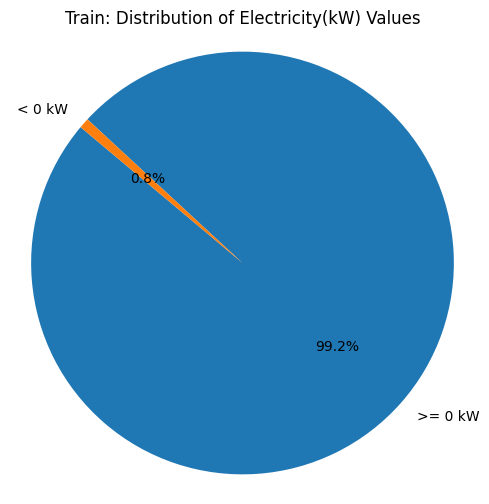

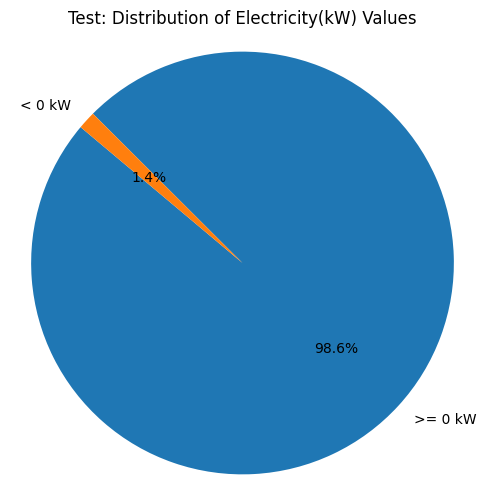

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_electricity_distribution(df, column_name,df_name):
    """
    Plots a pie chart showing the distribution of >=0 and <0 values in the specified column of a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    positive_or_zero = (df[column_name] >= 0).sum()
    negative = (df[column_name] < 0).sum()

    labels = ['>= 0 kW', '< 0 kW']
    sizes = [positive_or_zero, negative]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{df_name}: Distribution of {column_name} Values')
    plt.axis('equal')
    plt.show()

# Example usage:
plot_electricity_distribution(train_df, "Electricity(kW)", "Train")
plot_electricity_distribution(test_df, "Electricity(kW)", "Test")

In [ ]:
import folium

# Center of Chulalongkorn University
center_lat, center_lon = 13.7365, 100.5298

# Location data
locations = [
    {"name": "สถานีชาร์จ", "english": "EV Charging Station", "lat": 13.73624, "lon": 100.52995},
    {"name": "อาคารจามจุรี 4", "english": "Chamchuri 4", "lat": 13.73260, "lon": 100.53177},
    {"name": "อาคารจามจุรี 9", "english": "Chamchuri 9", "lat": 13.73380, "lon": 100.53045},
    {"name": "อาคารจุลจักรพงษ์", "english": "Julajak Phong", "lat": 13.73684, "lon": 100.52852},
    {"name": "อาคารบรมราชกุมารี", "english": "Boromrajakumari", "lat": 13.73800, "lon": 100.52905},
    {"name": "อาคารวิทยนิเวศน์", "english": "Vithayaniwet", "lat": 13.73723, "lon": 100.53015},
]

# Create minimal base map
cu_map = folium.Map(location=[center_lat, center_lon], zoom_start=17, tiles="CartoDB positron")

# Add markers with always-visible labels
for loc in locations:
    # Clickable marker
    folium.Marker(
        location=[loc["lat"], loc["lon"]],
        popup=f"{loc['name']} ({loc['english']})",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(cu_map)

    # Always-visible name tag
    folium.map.Marker(
        [loc["lat"], loc["lon"]],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 12px; color: black;"><b>{loc['name']}</b></div>"""
        )
    ).add_to(cu_map)

# Save and display
cu_map.save("chula_buildings_minimal_map.html")
cu_map

In [ ]:
import folium
import networkx as nx
import math

# Building coordinates
locations = {
    "สถานีชาร์จ": (13.73624, 100.52995),
    "อาคารจามจุรี 4": (13.73260, 100.53177),
    "อาคารจามจุรี 9": (13.73380, 100.53045),
    "อาคารจุลจักรพงษ์": (13.73684, 100.52852),
    "อาคารบรมราชกุมารี": (13.73800, 100.52905),
    "อาคารวิทยนิเวศน์": (13.73723, 100.53015),
}

# Function to calculate haversine distance (approximate)
def haversine(coord1, coord2):
    R = 6371  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat/2)**2 +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon/2)**2)
    return R * 2 * math.asin(math.sqrt(a))

# Build the graph
G = nx.Graph()

# Add nodes
for name, (lat, lon) in locations.items():
    G.add_node(name, pos=(lat, lon))

# Add edges: simple rule — connect each node to its 2 nearest neighbors
for src in locations:
    distances = []
    for dst in locations:
        if src != dst:
            dist = haversine(locations[src], locations[dst])
            distances.append((dst, dist))
    # Connect to 2 nearest
    for dst, dist in sorted(distances, key=lambda x: x[1])[:2]:
        G.add_edge(src, dst, weight=dist)

# Initialize map
center_lat, center_lon = 13.7365, 100.5298
campus_map = folium.Map(location=[center_lat, center_lon], zoom_start=17, tiles="CartoDB positron")

# Plot nodes
for name, (lat, lon) in locations.items():
    folium.Marker([lat, lon], tooltip=name).add_to(campus_map)

# Plot edges
for u, v in G.edges():
    latlngs = [locations[u], locations[v]]
    folium.PolyLine(latlngs, color="blue", weight=2.5, opacity=0.7).add_to(campus_map)

# Save and display
campus_map.save("chula_buildings_network_map.html")
campus_map

In [ ]:
import pandas as pd
import numpy as np
import torch
# Assume train_df already loaded
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Get all station names
stations = train_df['station_name'].unique().tolist()
station2idx = {name: i for i, name in enumerate(stations)}
num_nodes = len(stations)

# Pivot to shape: [time, station]
pivot_df = train_df.pivot(index='Date', columns='station_name', values='Electricity(kW)').fillna(0)
pivot_df = pivot_df[stations]  # enforce column order

# Normalize (optional)
data_array = pivot_df.values  # shape [T, N]
data_tensor = torch.tensor(data_array.T[np.newaxis, np.newaxis], dtype=torch.float32)  # shape [1, 1, T, N]

In [ ]:
import torch
import networkx as nx

# Create a graph from physical distance or manually connect nearby stations
G = nx.Graph()
for s in stations:
    G.add_node(s)

# Example: fully connected or 2 nearest neighbors
for i, s1 in enumerate(stations):
    for j, s2 in enumerate(stations):
        if i != j:
            G.add_edge(s1, s2, weight=1.0)  # simple unweighted

# Build adjacency matrix
A = nx.to_numpy_array(G, nodelist=stations)  # shape [N, N]
A = torch.tensor(A, dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Reduce time steps to avoid memory crash
B, C, T, N = 1, 1, 100, 6
data_tensor = torch.randn(B, C, T, N)

# Simulated adjacency matrix
A = torch.ones(N, N)

class STGCNLayer(nn.Module):
    def __init__(self, in_channels, out_channels, A):
        super().__init__()
        self.A = A
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 1))

    def forward(self, x):  # x: [B, C, T, N]
        print("Input x shape:", x.shape)
        print("Adjacency A shape:", self.A.shape)
        x = torch.einsum('bctv,vw->bctw', x, self.A)
        print("After einsum:", x.shape)
        x = self.conv(x)
        print("After conv:", x.shape)
        return F.relu(x)

class STGCN(nn.Module):
    def __init__(self, A):
        super().__init__()
        self.layer1 = STGCNLayer(1, 16, A)
        self.layer2 = STGCNLayer(16, 32, A)
        self.pool = nn.AdaptiveAvgPool2d((1, A.shape[0]))

    def forward(self, x):  # x: [B, 1, T, N]
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.pool(x)
        print("After pool:", x.shape)
        return x.squeeze(2).permute(0, 2, 1)  # [B, N, C]

# Run model
model = STGCN(A)
output = model(data_tensor)
print("Final output shape:", output.shape)

In [ ]:
A.shape

torch.Size([6, 6])

In [ ]:
output.shape

torch.Size([1, 6, 32])

In [ ]:
import pandas as pd

station_names = ['สถานีชาร์จ', 'อาคารจามจุรี 4', 'อาคารจามจุรี 9',
                 'อาคารจุลจักรพงษ์', 'อาคารบรมราชกุมารี', 'อาคารวิทยนิเวศน์']

# Convert tensor to numpy
embedding_np = output[0].detach().numpy()  # [6, 32]

# Build DataFrame
embedding_df = pd.DataFrame(embedding_np, columns=[f"stgcn_feat_{i}" for i in range(32)])
embedding_df["station_name"] = station_names



In [ ]:
embedding_df

,stgcn_feat_0,stgcn_feat_1,stgcn_feat_2,stgcn_feat_3,stgcn_feat_4,stgcn_feat_5,stgcn_feat_6,stgcn_feat_7,stgcn_feat_8,stgcn_feat_9,...,stgcn_feat_23,stgcn_feat_24,stgcn_feat_25,stgcn_feat_26,stgcn_feat_27,stgcn_feat_28,stgcn_feat_29,stgcn_feat_30,stgcn_feat_31,station_name
0,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,สถานีชาร์จ
1,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,อาคารจามจุรี 4
2,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,อาคารจามจุรี 9
3,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,อาคารจุลจักรพงษ์
4,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,อาคารบรมราชกุมารี
5,1.933851,0.0,1.690114,0.099137,2.416708,0.409688,0.851722,0.651031,1.439896,1.091612,...,0.0,0.025821,0.285233,0.756327,1.525959,1.347141,0.912022,0.981674,0.793987,อาคารวิทยนิเวศน์


## Modeling

In [ ]:
!pip install -U autogluon

## Baseline Model

In [ ]:
train_df

In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer

# -------------------------
# 1. Load and Clean Data
# -------------------------
train_df = pd.read_csv('/content/train_timeseries.csv')
test_df = pd.read_csv('/content/test_timeseries.csv')

# Clean non-finite values
def clean_non_finite(df):
    return df[np.isfinite(df['Electricity(kW)'])].copy()

train_df = clean_non_finite(train_df)
test_df = clean_non_finite(test_df)

print("✅ Cleaned non-finite values from 'Electricity(kW)' in train and test sets.")

# -------------------------
# 2. Feature Engineering
# -------------------------
# Convert Date to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Extract time-based features
for df in [train_df, test_df]:
    df['hour'] = df['Date'].dt.hour
    df['minute'] = df['Date'].dt.minute
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year

# Define features and target
feature_cols = ['station_name', 'hour', 'minute', 'dayofweek', 'month']
target_col = 'Electricity(kW)'

train_data = train_df[feature_cols + [target_col]]
test_data = test_df[feature_cols + [target_col]]

# Convert categorical features
for df in [train_data, test_data]:
    df['station_name'] = df['station_name'].astype('category')



# -------------------------
# 4. Train AutoGluon Model
# -------------------------
predictor = TabularPredictor(

    label=target_col,
    problem_type='regression',
    eval_metric="mse"
).fit(
    train_data=train_data,
    test_data=test_data,
    presets='best_quality',
    hyperparameters={'RF': {}},
    time_limit=3600
)

# -------------------------
# 5. Predict and Evaluate
# -------------------------
y_true = test_data[target_col].values
y_pred = predictor.predict(test_data)

# Add predictions to dataframe
test_data['y_true'] = y_true
test_data['y_pred'] = y_pred
predictor.leaderboard(test_data, silent=True)

/tmp/ipython-input-26-3700075415.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['station_name'] = df['station_name'].astype('category')
/tmp/ipython-input-26-3700075415.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['station_name'] = df['station_name'].astype('category')
No path specified. Models will be saved in: "AutogluonModels/ag-20250713_172630"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Ope

✅ Cleaned non-finite values from 'Electricity(kW)' in train and test sets.


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-07-13 17:26:34,362	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/content/AutogluonModels/ag-20250713_172630/ds_sub_fit/sub_fit_ho"
(_dystack pid=4548) Running DyStack sub-fit ...
(_dystack pid=4548) Beginning AutoGluon training ... Time limit = 893s
(_dystack pid=4548) AutoGluon will save models to "/content/AutogluonModels/ag-20250713_172630/ds_sub_fit/sub_fit_ho"
(_dystack pid=4548) Train Data Rows:    145094
(_dystack pid=4548) Train Data Columns: 5
(_dystack pid=4548) Label Column:       Electricity(kW)
(_dystack pid=4548) Problem Type:       regression
(_dystack pid=4548) Preprocessing data ...
(_dystack pid=4548) Using Feature Generators to preprocess the data ...
(_dystack pid=4548) Fitting AutoMLPipelineFeature

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_BAG_L1,-5355.989773,-3352.69912,mean_squared_error,1.849442,4.848804,58.855102,1.849442,4.848804,58.855102,1,True,1
1,WeightedEnsemble_L2,-5355.989773,-3352.69912,mean_squared_error,1.852521,4.853080,58.865371,0.003080,0.004276,0.010269,2,True,2
2,RandomForest_BAG_L2,-5440.032022,-938.99483,mean_squared_error,3.738754,9.769555,197.058161,1.889312,4.920750,138.203059,2,True,3
3,WeightedEnsemble_L3,-5440.032022,-938.99483,mean_squared_error,3.742593,9.772870,197.176698,0.003839,0.003315,0.118537,3,True,4


In [ ]:
predictor.leaderboard(test_data, silent=True) # Clean

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_BAG_L1,-5355.989773,-3352.69912,mean_squared_error,2.315610,4.848804,58.855102,2.315610,4.848804,58.855102,1,True,1
1,WeightedEnsemble_L2,-5355.989773,-3352.69912,mean_squared_error,2.319940,4.853080,58.865371,0.004330,0.004276,0.010269,2,True,2
2,RandomForest_BAG_L2,-5440.032022,-938.99483,mean_squared_error,5.169840,9.769555,197.058161,2.854230,4.920750,138.203059,2,True,3
3,WeightedEnsemble_L3,-5440.032022,-938.99483,mean_squared_error,5.173542,9.772870,197.176698,0.003702,0.003315,0.118537,3,True,4


In [ ]:
predictor.leaderboard(test_data, silent=True) # Baseline

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_BAG_L1,-5610.431217,-3515.134109,mean_squared_error,2.876228,4.994084,60.134012,2.876228,4.994084,60.134012,1,True,1
1,WeightedEnsemble_L2,-5610.431217,-3515.134109,mean_squared_error,2.880094,4.997679,60.142329,0.003866,0.003595,0.008318,2,True,2
2,RandomForest_BAG_L2,-5645.500003,-982.451667,mean_squared_error,5.147612,10.914464,195.925424,2.271384,5.920380,135.791412,2,True,3
3,WeightedEnsemble_L3,-5645.500003,-982.451667,mean_squared_error,5.150254,10.918097,196.055096,0.002642,0.003633,0.129672,3,True,4


In [ ]:
station_df

,station_name,hour,minute,dayofweek,month,Electricity(kW),y_true,y_pred,day,datetime
32180,Data_อาคารวิทยนิเวศน์,0,0,0,9,0.00,0.00,0.128157,1,2025-09-01 00:00:00
32181,Data_อาคารวิทยนิเวศน์,0,15,0,9,0.00,0.00,0.128157,1,2025-09-01 00:15:00
32182,Data_อาคารวิทยนิเวศน์,0,30,0,9,0.00,0.00,0.128157,1,2025-09-01 00:30:00
32183,Data_อาคารวิทยนิเวศน์,0,45,0,9,0.00,0.00,0.128157,1,2025-09-01 00:45:00
32184,Data_อาคารวิทยนิเวศน์,1,0,0,9,0.00,0.00,0.128157,1,2025-09-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...
39087,Data_อาคารวิทยนิเวศน์,22,45,2,11,0.00,0.00,0.128157,27,2025-11-27 22:45:00
39088,Data_อาคารวิทยนิเวศน์,23,0,2,11,0.00,0.00,0.125200,27,2025-11-27 23:00:00
39089,Data_อาคารวิทยนิเวศน์,23,15,2,11,0.00,0.00,0.125200,27,2025-11-27 23:15:00
39090,Data_อาคารวิทยนิเวศน์,23,30,2,11,0.00,0.00,0.125200,27,2025-11-27 23:30:00


In [ ]:
test_data['y_pred'] = y_pred

In [ ]:
len(test_data[(test_data['Electricity(kW)'] == 0) & (test_data['month'] == 10)])

837

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create fake `day` assuming 15-minute intervals = 96 points per day
test_data = test_data.copy()
test_data['day'] = (test_data.groupby(['station_name', 'year', 'month']).cumcount() // 96) + 1

# Step 2: Build datetime
test_data['datetime'] = pd.to_datetime({
    'year': test_data['year'],
    'month': test_data['month'],
    'day': test_data['day'],
    'hour': test_data['hour'],
    'minute': test_data['minute']
}, errors='coerce')

# Drop invalid datetimes (e.g., day=31 in Feb)
test_data = test_data.dropna(subset=['datetime'])

# Step 3: Plot actual vs predicted by station with line + scatter
for station in test_data['station_name'].unique():
    station_df = test_data[test_data['station_name'] == station]

    plt.figure(figsize=(14, 5))

    # Line plot
    plt.plot(station_df['datetime'], station_df['Electricity(kW)'], label='Actual (Line)', linewidth=2)
    plt.plot(station_df['datetime'], station_df['y_pred'], label='Predicted (Line)', linestyle='--', linewidth=2)

    # Scatter plot
    plt.scatter(station_df['datetime'], station_df['Electricity(kW)'], label='Actual (Points)', color='blue', s=10, alpha=0.5)
    plt.scatter(station_df['datetime'], station_df['y_pred'], label='Predicted (Points)', color='orange', s=10, alpha=0.5)

    plt.title(f"🔌 Actual vs Predicted — {station}")
    plt.xlabel("Datetime")
    plt.ylabel("Electricity (kW)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Show test score
test_score = predictor.evaluate(test_data)

print("\n✅ Test score (based on your custom WAPE metric):")
print(test_score)


✅ Test score (based on your custom WAPE metric):
{'mean_squared_error': -5451.992391489654, 'root_mean_squared_error': np.float64(-73.83760824599923), 'mean_absolute_error': -37.29465069917298, 'r2': 0.6543136590211078, 'pearsonr': 0.8179052729580331, 'median_absolute_error': np.float64(-9.948104858398438)}


In [ ]:
# Step 1: Merge weights into test data
merged_df = test_data.merge(station_weights_df, on='station_name', how='left')

# Step 2: Compute weighted absolute error and weighted actual
merged_df['weighted_abs_error'] = merged_df['normalized_reverse_weight'] * abs(merged_df['y_true'] - merged_df['y_pred'])
merged_df['weighted_actual'] = merged_df['normalized_reverse_weight'] * abs(merged_df['y_true'])

# Step 3: Compute WAPE
wape = merged_df['weighted_abs_error'].sum() / merged_df['weighted_actual'].sum()
print("WAPE:", wape)

WAPE: 0.4041009796266036


## Experiment

In [ ]:
test_data.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 40839 entries, ('Data_สถานีชาร์จ', Timestamp('2024-09-16 00:00:00')) to ('Data_อาคารวิทยนิเวศน์', Timestamp('2024-11-27 23:45:00'))
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     40839 non-null  object 
 1   Electricity(kW)  40839 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

# 1. Load and clean
train_df = pd.read_csv('/content/train_timeseries.csv')
test_df = pd.read_csv('/content/test_timeseries.csv')

def clean_non_finite(df):
    return df[np.isfinite(df['Electricity(kW)'])].copy()

train_df = clean_non_finite(train_df)
test_df = clean_non_finite(test_df)

train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

train_df['item_id'] = train_df['station_name']
test_df['item_id'] = test_df['station_name']

# 2. Convert to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame.from_data_frame(train_df, id_column='item_id', timestamp_column='Date')
test_data = TimeSeriesDataFrame.from_data_frame(test_df, id_column='item_id', timestamp_column='Date')

# 3. Set prediction length (e.g., 96 steps = next 24 hours for 15min freq)
prediction_length = 96
freq = "15min"

# 4. Train the predictor
predictor = TimeSeriesPredictor(
    label="Electricity(kW)",
    prediction_length=prediction_length,
    eval_metric="mse",
    path="AutogluonTimeSeriesModels",
    freq=freq
)

predictor.fit(
    train_data=train_data,
    enable_ensemble=False,
    presets='best_quality',
    time_limit=3600,
)

Beginning AutoGluon training... Time limit = 3600s
AutoGluon will save models to '/content/AutogluonTimeSeriesModels'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       9.17 GB / 12.67 GB (72.4%)
Disk Space Avail:   69.60 GB / 112.64 GB (61.8%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': MSE,
 'freq': '15min',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Electricity(kW)',
 'time_limit': 3600,
 'verbosity': 2}

train_data with frequency 'IRREG' ha

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-1357.1758    = Validation score (-MSE)
	10.17   s     = Training runtime
	1.67    s     = Validation (prediction) runtime
Training timeseries model ChronosFineTuned[bolt_small]. Training for up to 698.9s of the 3494.5s of remaining time.
	Skipping covariate_regressor since the dataset contains no covariates or static features.
	Saving fine-tuned model to /content/AutogluonTimeSeriesModels/models/ChronosFineTuned[bolt_small]/W0/fine-tuned-ckpt
	Skipping covariate_regressor since the dataset contains no covariates or static features.
	Saving fine-tuned model to /content/AutogluonTimeSeriesModels/models/ChronosFineTuned[bolt_small]/W1/fine-tuned-ckpt
	-1159.9103    = Validation score (-MSE)
	590.40  s     = Training runtime
	0.16    s     = Validation (prediction) runtime
Training timeseries model TemporalFusionTransformer. Training for up to 726.0s of the 2903.9s of remaining time.
	-699.5242     = Validation score (-MSE)
	585.76  s     = Training runtime
	0.69    s     = Validation (p

In [ ]:
predictions = predictor.predict(test_data, model="PatchTST")

data with frequency 'IRREG' has been resampled to frequency '15min'.


In [ ]:
import pandas as pd
from autogluon.timeseries.metrics import TimeSeriesScorer

class WeightedWAPE(TimeSeriesScorer):
    """
    Weighted Absolute Percentage Error (WAPE), where each series
    is weighted by a user‐provided mapping of normalized_reverse_weight.
    """
    greater_is_better_internal = False  # lower is better
    optimum = 0.0

    def __init__(self, prediction_length: int, station_weights: pd.Series):
        # Only pass prediction_length to the super; no `name=` argument.
        super().__init__(prediction_length=prediction_length)
        # station_weights: pd.Series indexed by item_id (i.e. station_name)
        self.station_weights = station_weights

    def compute_metric(self, data_future, predictions, target, **kwargs) -> float:
        """
        data_future[target]  : TimeSeriesDataFrame of true values over the forecast horizon
        predictions["mean"]  : TimeSeriesDataFrame of point forecasts over the same horizon
        """
        # Flatten out the multi‐index into aligned 1D arrays
        y_true = data_future[target]      # pd.Series, index: (item_id, timestamp)
        y_pred = predictions["mean"]      # pd.Series, same index

        # Extract the item_ids for each row in the forecast horizon
        item_ids = y_true.index.get_level_values("item_id")
        # Map to the weights you computed earlier
        weights  = pd.Series(item_ids).map(self.station_weights).to_numpy()

        abs_err    = (y_true - y_pred).abs().to_numpy()
        abs_actual = y_true.abs().to_numpy()

        weighted_error    = (weights * abs_err).sum()
        weighted_actual   = (weights * abs_actual).sum()
        return weighted_error / weighted_actual

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor
from autogluon.timeseries.metrics import SMAPE, MASE
# 1) turn your station_weights_df into a Series indexed by station_name
station_weights = station_weights_df.set_index("station_name")["normalized_reverse_weight"]

# 2) instantiate your metric
wwape = WeightedWAPE(
    prediction_length=predictor.prediction_length,
    station_weights=station_weights
)


# Now call leaderboard on your held-out data, asking for extra metrics:
lb = predictor.leaderboard(
    data=test_data,
    extra_metrics=[
        "MSE",
        "MAE",        # mean absolute error
        SMAPE(),      # symmetric MAPE as a TimeSeriesScorer object
        MASE(),       # mean absolute scaled error as a TimeSeriesScorer object
        wwape
    ],
)
lb

data with frequency 'IRREG' has been resampled to frequency '15min'.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order,MSE,MAE,SMAPE,MASE,WeightedWAPE
0,PatchTST,-1979.706830,-2829.959814,0.075835,0.082270,404.250046,11,-1979.706830,-21.840220,-0.535284,-0.538238,-0.209549
1,DirectTabular,-2174.131611,-2196.477459,0.382370,1.235511,14.216663,3,-2174.131611,-21.697794,-0.499528,-0.512376,-0.208101
2,DynamicOptimizedTheta,-2528.263916,-10392.182081,8.003008,5.602563,7.049314,5,-2528.263916,-28.548972,-0.590800,-0.722789,-0.274790
3,ChronosZeroShot[bolt_base],-2720.612089,-1357.175819,1.676965,1.665461,10.174235,7,-2720.612089,-24.094600,-0.523142,-0.534986,-0.230438
4,ChronosFineTuned[bolt_small],-2743.501322,-1159.910250,0.991712,0.162521,590.402603,8,-2743.501322,-24.371484,-0.519402,-0.549547,-0.233208
5,RecursiveTabular,-2747.433680,-2491.898946,1.523252,1.674302,26.087509,2,-2747.433680,-22.510119,-0.490290,-0.498970,-0.215372
6,TiDE,-2810.483691,-1116.094873,0.163878,0.598751,1410.304220,12,-2810.483691,-24.261119,-0.479123,-0.524727,-0.232225
7,SeasonalNaive,-3320.026493,-6608.071581,0.032696,0.055572,0.482920,1,-3320.026493,-25.506667,-0.290535,-0.545236,-0.243881
8,TemporalFusionTransformer,-3610.816286,-699.524238,0.136522,0.691653,585.756244,9,-3610.816286,-29.751925,-0.562481,-0.665116,-0.284624
9,DeepAR,-5105.787292,-2073.273384,0.535085,0.832941,421.826988,10,-5105.787292,-42.193726,-0.779038,-1.074585,-0.405665


In [ ]:
predictor.evaluate(test_data)

data with frequency 'IRREG' has been resampled to frequency '15min'.
Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


{'MSE': -3160.452874392981}

In [ ]:
predictor.plot(test_data,predictions)

TypeError: TimeSeriesPredictor.plot() got an unexpected keyword argument 'model'

In [ ]:
predictor("PatchTST")